# ACP de visages

Nous allons faire une ACP sur des images. On considérera pour cela que nos images sont des vecteurs où chaque pixel est un entier entre 0 et 255 (en niveaux de gris).

## Chargement des données

Le chargement des données MNIST s'effectue facilement grâce aux commandes suivantes. Le site associé est http://vis-www.cs.umass.edu/lfw/

**Attention** : la 1ère fois, la ligne suivante va télécharger 200 méga de données, et créer un dossier `lfw_home`.

On va télécharger les images des personnalités ayant plus de 20 images ([doc de la fonction](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html))

In [1]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(data_home=".", min_faces_per_person=20, resize=0.4)

Quelques variables associées aux images :

In [2]:
images = lfw_people.data #liste d'images
nombre_images, hauteur_image, largeur_image = lfw_people.images.shape

print("nombre images : ", nombre_images)
print("dimension des images : ", hauteur_image, largeur_image)

nombre images :  3023
dimension des images :  50 37


Les personnalités : 

In [3]:
personnalités = lfw_people.target_names

for nom in personnalités:
    print(nom)

Alejandro Toledo
Alvaro Uribe
Amelie Mauresmo
Andre Agassi
Angelina Jolie
Ariel Sharon
Arnold Schwarzenegger
Atal Bihari Vajpayee
Bill Clinton
Carlos Menem
Colin Powell
David Beckham
Donald Rumsfeld
George Robertson
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Gray Davis
Guillermo Coria
Hamid Karzai
Hans Blix
Hugo Chavez
Igor Ivanov
Jack Straw
Jacques Chirac
Jean Chretien
Jennifer Aniston
Jennifer Capriati
Jennifer Lopez
Jeremy Greenstock
Jiang Zemin
John Ashcroft
John Negroponte
Jose Maria Aznar
Juan Carlos Ferrero
Junichiro Koizumi
Kofi Annan
Laura Bush
Lindsay Davenport
Lleyton Hewitt
Luiz Inacio Lula da Silva
Mahmoud Abbas
Megawati Sukarnoputri
Michael Bloomberg
Naomi Watts
Nestor Kirchner
Paul Bremer
Pete Sampras
Recep Tayyip Erdogan
Ricardo Lagos
Roh Moo-hyun
Rudolph Giuliani
Saddam Hussein
Serena Williams
Silvio Berlusconi
Tiger Woods
Tom Daschle
Tom Ridge
Tony Blair
Vicente Fox
Vladimir Putin
Winona Ryder


In [4]:
personnalités_index = [personnalités[lfw_people.target[index]] for index in range(nombre_images)]

for index in range(nombre_images):
    print("image", index, "nom :", personnalités_index[index])

image 0 nom : Winona Ryder
image 1 nom : Jean Chretien
image 2 nom : Carlos Menem
image 3 nom : Ariel Sharon
image 4 nom : Alvaro Uribe
image 5 nom : Colin Powell
image 6 nom : Recep Tayyip Erdogan
image 7 nom : Gray Davis
image 8 nom : George Robertson
image 9 nom : Silvio Berlusconi
image 10 nom : George W Bush
image 11 nom : George W Bush
image 12 nom : Nestor Kirchner
image 13 nom : Jean Chretien
image 14 nom : Bill Clinton
image 15 nom : George W Bush
image 16 nom : Carlos Menem
image 17 nom : Alvaro Uribe
image 18 nom : George W Bush
image 19 nom : Colin Powell
image 20 nom : Donald Rumsfeld
image 21 nom : George W Bush
image 22 nom : Hugo Chavez
image 23 nom : George W Bush
image 24 nom : George W Bush
image 25 nom : George W Bush
image 26 nom : George W Bush
image 27 nom : Andre Agassi
image 28 nom : Gerhard Schroeder
image 29 nom : Pete Sampras
image 30 nom : Ariel Sharon
image 31 nom : Arnold Schwarzenegger
image 32 nom : Recep Tayyip Erdogan
image 33 nom : Jennifer Capriati


## Regardons les images

Chaque image est une liste de coordonnées. 
Nos donnees sont ainsi des vecteurs de dimension hauteur * largeur. Chaque coordonnée est un niveau de gris.

Regardans l'image d'index 2698

In [5]:
print(images[2698])

[0.07973856 0.07320262 0.14117648 ... 0.32156864 0.44575164 0.31895426]


Pour représenter graphiquement cette ligne, il faut reconstruire l'image en la séparant en ligne :

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.reset_orig() # pour une fois on ne veut pas des paramètres de seaborn
current_palette = sns.color_palette()

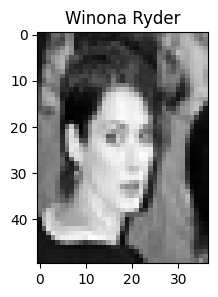

In [7]:
fig, ax = plt.subplots(figsize=(3, 3)) 

plt.imshow(images[2698].reshape((hauteur_image, largeur_image)), 
           cmap=plt.cm.gray)

plt.title(personnalités_index[2698])

plt.show()

**QUESTION** : Trouvez l'index de toutes les photos de winona ryder.

## l'ACP

Centrer et reduire les donnees a normalisé les niveaux de gris pour toutes les images. On est pas obligé de le faire, mais si on ne le fait pas, le calcul des $cos^2$ va être faux, il ne faudra pas en tenir compte.

On utilisera maintenant les données centrées et réduites. Elles sont un peut différentes des images de départ. Regardez commant Winona a été changée.

In [8]:
images

array([[0.00130719, 0.        , 0.        , ..., 0.06666667, 0.07450981,
        0.09803922],
       [0.        , 0.        , 0.        , ..., 0.11633987, 0.09803922,
        0.075817  ],
       [0.        , 0.        , 0.        , ..., 0.05228758, 0.05620915,
        0.07712419],
       ...,
       [0.06013072, 0.08104575, 0.12418301, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05359477, 0.01830065,
        0.00392157],
       [0.00130719, 0.00261438, 0.00130719, ..., 0.20261438, 0.18300654,
        0.14117648]], dtype=float32)

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas

In [10]:
scaler = StandardScaler()

images_scaled = scaler.fit_transform(images)

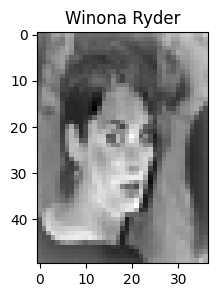

In [11]:
fig, ax = plt.subplots(figsize=(3, 3)) 

plt.imshow(images_scaled[2698].reshape((hauteur_image, largeur_image)), 
           cmap=plt.cm.gray)

plt.title(personnalités_index[2698])

plt.show()

Effectuons une analyse en composantes principale de nos images.

Comme le nombre de dimensions est très importante, nous ne calculerons que les 50 premiers axes. On choisi le nombre d'axe à conserver en utilisant le paramètre `n_components` de la fonction `PCA` de sklearn (voir https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [12]:
import pandas
from sklearn.decomposition import PCA 
import numpy as np

In [13]:
X = pandas.DataFrame(images_scaled)

pca = PCA(n_components=50)
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

corrélations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2 = (C**2).div((X**2).sum(axis=1), axis='index')

**QUESTION** : Affichez l'inertie du nuage


* regarder l'inertie cumulée. Combien d'inertie est conservée sur les 50 permiers axes ?
* combien d'axes avons nous en tout ?
* la qualité de la représentation (l'angle) pour les 50 axes gardés 
* pour les 12 premiers axes

## On peut regarder les nouveaux axes (eigenfaces)

On a gardé les 50 premiers vecteur propres. Chacun étant un vecteur de dimension  hauteur * largeur :

In [14]:
hauteur_image * largeur_image

1850

Le premier vecteur est une colonne de U. Pour l'obtenir :

In [15]:
U.transpose()[0]

array([0.01719545, 0.01887081, 0.02004973, ..., 0.00679188, 0.00695472,
       0.00739177], dtype=float32)

**QUESTION** : Représentez l'image associée à cet axe

**QUESTION** : Représentez les images associées aux 12 premiers axes

## Les images approximées

On peu reconstruire les images en n'utilisant que les axes considérés. Nous en avons pris 50 sur les hauteur * largeur possibles.

In [16]:
images_scaled

array([[-0.55067575, -0.6151551 , -0.65207493, ..., -0.53716755,
        -0.44773105, -0.23511924],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.32017204,
        -0.34254155, -0.33777082],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.5999821 ,
        -0.5295451 , -0.33173248],
       ...,
       [-0.29388264, -0.28372267, -0.16557081, ..., -0.8283984 ,
        -0.7808312 , -0.68799376],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.59427166,
        -0.6990171 , -0.6698788 ],
       [-0.55067575, -0.60446376, -0.6469538 , ...,  0.05671495,
         0.03730947, -0.03585443]], dtype=float32)

Pour ne conserver que les 50 premiers axes, on pourrait faire le calcul en reprojetant nos nouvelles coordonnées sur l'ancien repère, mais la sklearn nous permet de le faire tout seul.

**QUESTION** : Quelle est la qualité de représentation ($cos^2$ et angle) de l'image 2698 ?

Winona dans le nouveau repère des 50 premiers axes factoriels :

In [17]:
C.iloc[2698]

0     -7.479180
1     -0.090737
2     11.023788
3      3.935652
4      9.338691
5     -3.892557
6      5.471926
7      3.159878
8     -0.318883
9     10.622475
10    -1.685301
11    -0.306060
12     3.151610
13    -2.547348
14    -0.386518
15    -6.899920
16     2.520666
17     1.813191
18    -6.696075
19     0.326863
20    -7.788678
21     0.628080
22    -2.749119
23    -0.761297
24    -2.074761
25    -0.635200
26   -11.016380
27    -4.106153
28    -1.915696
29     0.652274
30    -1.900915
31     1.079674
32    -3.176453
33     0.210089
34    -5.016719
35     2.192713
36     1.519675
37     3.426169
38    -1.490252
39     0.050919
40     3.585267
41    -2.033335
42    -2.385528
43     1.730845
44    -1.895276
45     1.964814
46     1.392400
47     0.047760
48    -1.959176
49     2.318063
Name: 2698, dtype: float32

Dans le repère originel :

In [18]:
image_reconstruite = pca.inverse_transform(C.iloc[2698])

image_reconstruite

array([-0.046719  , -0.01834871,  0.00973143, ...,  0.17462447,
        0.05412918, -0.06219066], dtype=float32)

**QUESTION** : représentez l'image reconstruite. Mettez côte à côte l'image originelle, l'image centrée réduite et l'image sur les 50 premiers axes factoriels.

## Nombre d'axes utilisés

On ne va pas centrer/reduire les données et voir l'évolution d'une image lorsque l'on ajoute des axes.

Pour cela, commançons par faire une ACP sur 200 composantes (attention, ça va prendre du temps) :

In [21]:
X_img = pandas.DataFrame(images)

pca = PCA(n_components=200)
pca.fit(X_img)

U_img = np.transpose(pca.components_) # vecteurs propres
I_img = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C_img = pandas.DataFrame(X_img @ U_img, index=X.index) # nouvelles coordonnées

corrélations_img = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2_img = (C**2).div((X**2).sum(axis=1), axis='index')

Les coordonnées d'une image selon les nouveaux axes dont données par `C_img` et les coordonnées des nouveaux axes dans l'ancien repère est donnée par `U_img`.

Les coodonnées de l'image 2698 dans le repère original est alors, pour les 200 axes :

In [22]:
np.matmul(U_img, C_img.loc[2698])

array([0.00790578, 0.10688856, 0.19236714, ..., 0.30816486, 0.3044304 ,
       0.29612756], dtype=float32)

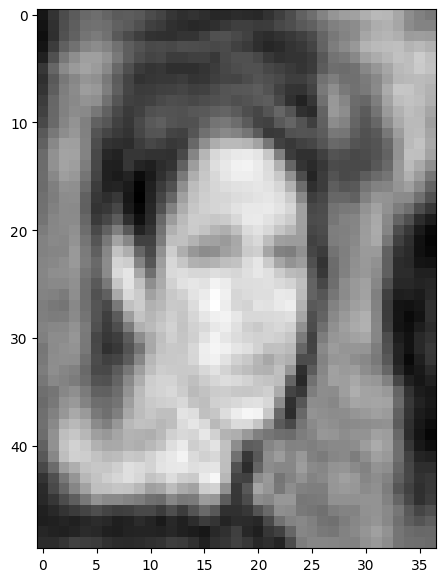

In [23]:
img = np.matmul(U_img, C_img.loc[2698])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
             cmap=plt.cm.gray)
plt.show()

Et pour les 50 premiers axes : 

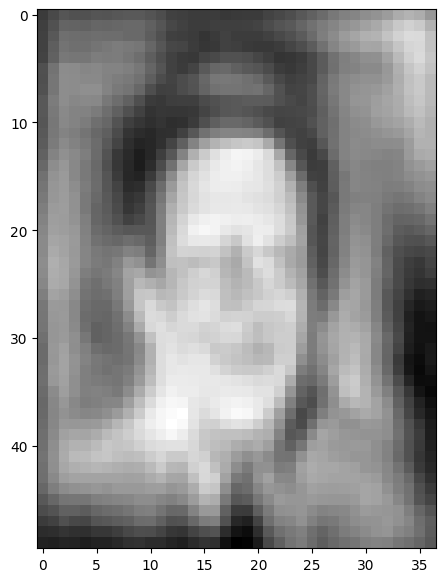

In [24]:
img = np.matmul(U_img[:, :50], C_img.loc[2698][:50])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
          cmap=plt.cm.gray)
plt.show()

**Question** Prenez l'image de la base de données d'indice 2698 et affichez sa reconstruction par une acp utilisant 
5, 10, 50, 100 et 200 composantes.

## Quels axes sont importants pour une image donnée

**QUESTION** :  Regardez la qualité de la projection de cette image avec les nouveaux axes et trouvez les 12 axes les plus important pour cette image.

**QUESTION** : Dessinez les eigenfaces correspondantes à ces 12 vecteurs.